## The LDA result of ile

In [37]:
import pandas as pd
df=pd.read_csv("./region_new/ile.csv")

In [38]:
df.head()

,Unnamed: 0,authorId,id,reference,title,createdAt,publishedAt,updatedAt,trashed,trashedStatus,...,QUXVlc3Rpb246MTUx - Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements ?,"QUXVlc3Rpb246MTUy - Par rapport à votre mode de chauffage actuel, pensez-vous qu'il existe des solutions alternatives plus écologiques ?","QUXVlc3Rpb246MTUz - Si oui, que faudrait-il faire pour vous convaincre ou vous aider à changer de mode de chauffage ?","QUXVlc3Rpb246MTU0 - Avez-vous pour vos déplacements quotidiens la possibilité de recourir à des solutions de mobilité alternatives à la voiture individuelle comme les transports en commun, le covoiturage, l'auto-partage, le transport à la demande, le vélo, etc. ?","QUXVlc3Rpb246MTU1 - Si oui, que faudrait-il faire pour vous convaincre ou vous aider à utiliser ces solutions alternatives ?","QUXVlc3Rpb246MjA3 - Si non, quelles sont les solutions de mobilité alternatives que vous souhaiteriez pouvoir utiliser ?",QUXVlc3Rpb246MTU3 - Et qui doit selon vous se charger de vous proposer ce type de solutions alternatives ?,QUXVlc3Rpb246MTU4 - Que pourrait faire la France pour faire partager ses choix en matière d'environnement au niveau européen et international ?,QUXVlc3Rpb246MTU5 - Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?,Region
0,0,VXNlcjo0M2I1ODJkNy0zNTI1LTExZTktYmY1Ni1mYTE2M2...,UHJvcG9zYWw6MjEyYTViZjAtMzUyYi0xMWU5LWJmNTYtZm...,2-79214,Actions urgentes,2019-02-20 17:18:16,2019-02-20 17:18:16,NaN,False,NaN,...,développer alternative transports commun adap...,Oui,edf répondre demande,Je n'utilise pas la voiture pour des déplaceme...,NaN,transports commun|le vélo|le covoiturage,spécialiste mobilité,réduire liberté commercer libre concurrencer ...,limiter pouvoir interdire constituer facteur ...,ile
1,1,VXNlcjo0M2I5YzAwYy00MGY2LTExZTktYmY1Ni1mYTE2M2...,UHJvcG9zYWw6Mjg0ZmI5ZTgtNDEwZi0xMWU5LWJmNTYtZm...,2-113746,stop aux tickets de caisse,2019-03-07 20:28:16,2019-03-07 20:28:16,NaN,False,NaN,...,prévoir consignation bouteille plastiquer ver...,Non,NaN,Je n'utilise pas la voiture pour des déplaceme...,NaN,NaN,collectivité locale lien citoyen,NaN,falloir re créer cuisine école maison retrait...,ile
2,2,VXNlcjo0M2IxNTFhZC0yZmEzLTExZTktYmY1Ni1mYTE2M2...,UHJvcG9zYWw6YTQ2ZmU1NTctMmZiNy0xMWU5LWJmNTYtZm...,2-67584,Ecologie positive,2019-02-13 18:48:59,2019-02-13 18:48:59,NaN,False,NaN,...,NaN,Oui,radiateur énergisant falloir pouvoir achat,Non,NaN,transports commun,région parisien vrai travail effectuer transp...,falloir harmoniser europe taxe carbone notamm...,falloir arrêter punir falloir juste vivre viv...,ile
3,3,VXNlcjo0M2IyNzEwYi0zY2U3LTExZTktYmY1Ni1mYTE2M2...,UHJvcG9zYWw6MWQ0MjMzZDMtM2ViMC0xMWU5LWJmNTYtZm...,2-106040,Contribution,2019-03-04 20:02:53,2019-03-04 20:02:53,NaN,False,NaN,...,faire payer taxe ordure ménagère poids favori...,Oui,falloir convaincre propriétaire,Oui,falloir développer transports commun obliger ...,transports commun,service municipaux employeur,demander plan européen transport écologique,recherche devoir favoriser financer solution ...,ile
4,4,VXNlcjo0M2JmNTg0MC0yMDcwLTExZTktOTRkMi1mYTE2M2...,UHJvcG9zYWw6MTk3OTNmMDQtMjA3Mi0xMWU5LTk0ZDItZm...,2-20235 // 2-56419,Rééquilibrage de la fiscalité sur les carburan...,2019-01-25 08:23:23 // 2019-02-07 08:43:19,2019-01-25 08:23:23 // 2019-02-07 08:43:19,NaN,False,NaN,...,équilibrage taxe essence diesel changer envel...,Oui,NaN,Oui,amélioration desserte régularité particulier ...,NaN,NaN,NaN,NaN,ile


In [39]:
df.columns

Index(['Unnamed: 0', 'authorId', 'id', 'reference', 'title', 'createdAt',
       'publishedAt', 'updatedAt', 'trashed', 'trashedStatus', 'authorType',
       'authorZipCode',
       'QUXVlc3Rpb246MTYw - Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?',
       'QUXVlc3Rpb246MTYx - Que faudrait-il faire selon vous pour apporter des réponses à ce problème ?',
       'QUXVlc3Rpb246MTQ2 - Diriez-vous que votre vie quotidienne est aujourd'hui touchée par le changement climatique ?',
       'QUXVlc3Rpb246MTQ3 - Si oui, de quelle manière votre vie quotidienne est-elle touchée par le changement climatique ?',
       'QUXVlc3Rpb246MTQ4 - À titre personnel, pensez-vous pouvoir contribuer à protéger l'environnement ?',
       'QUXVlc3Rpb246MTQ5 - Si oui, que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire ?',
       'QUXVlc3Rpb246MTUw - Qu'est-ce qui pourrait vous inciter à changer vos comportements comme

In [40]:
df.columns[12]

"QUXVlc3Rpb246MTYw - Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?"

In [41]:
data1=df[df.columns[12]]
print("The answer number before delete none: ",data1.size)
data1=data1.dropna(axis=0)  
print("The useful answer number: ",data1.size)

The answer number before delete none:  18279
The useful answer number:  17473


In [42]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords 
stop = stopwords.words('french')
stopwords_french = stop+["com", "Ap.", "Apr.", "GHz", "MHz", "USD", "a", "afin", "ah", "ai", "aie", "aient", "aies", "ait", "alors", "après", "as", "attendu", "au", "au-delà", "au-devant", "aucun", "aucune", "audit", "auprès", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autour", "autre", "autres", "autrui", "aux", "auxdites", "auxdits", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avons", "ayant", "ayez", "ayons", "b", "bah", "banco", "ben", "bien", "bé", "c", "c'", "c'est", "c'était", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cents", "cependant", "certain", "certaine", "certaines", "certains", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "cf.", "cg", "cgr", "chacun", "chacune", "chaque", "chez", "ci", "cinq", "cinquante", "cinquante-cinq", "cinquante-deux", "cinquante-et-un", "cinquante-huit", "cinquante-neuf", "cinquante-quatre", "cinquante-sept", "cinquante-six", "cinquante-trois", "cl", "cm", "cm2", "comme", "contre", "d", "d'", "d'après", "d'un", "d'une", "dans", "de", "depuis", "derrière", "des", "desdites", "desdits", "desquelles", "desquels", "deux", "devant", "devers", "dg", "différentes", "différents", "divers", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dl", "dm", "donc", "dont", "douze", "du", "dudit", "duquel", "durant", "dès", "déjà", "e", "eh", "elle", "elles", "en", "en-dehors", "encore", "enfin", "entre", "envers", "es", "est", "et", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "e?mes", "e?t", "e?tes", "f", "fait", "fi", "flac", "fors", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "f?mes", "f?t", "f?tes", "g", "gr", "h", "ha", "han", "hein", "hem", "heu", "hg", "hl", "hm", "hm3", "holà", "hop", "hormis", "hors", "huit", "hum", "hé", "i", "ici", "il", "ils", "j", "j'", "j'ai", "j'avais", "j'étais", "jamais", "je", "jusqu'", "jusqu'au", "jusqu'aux", "jusqu'à", "jusque", "k", "kg", "km", "km2", "l", "l'", "l'autre", "l'on", "l'un", "l'une", "la", "laquelle", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "lez", "lors", "lorsqu'", "lorsque", "lui", "lès", "m", "m'", "ma", "maint", "mainte", "maintes", "maints", "mais", "malgré", "me", "mes", "mg", "mgr", "mil", "mille", "milliards", "millions", "ml", "mm", "mm2", "moi", "moins", "mon", "moyennant", "mt", "m2", "m3", "même", "mêmes", "n", "n'avait", "n'y", "ne", "neuf", "ni", "non", "nonante", "nonobstant", "nos", "notre", "nous", "nul", "nulle", "no",
                    "néanmoins", "o", "octante", "oh", "on", "ont", "onze", "or", "ou", "outre", "où", "p", "par", "par-delà", "parbleu", "parce", "parmi", "pas", "passé", "pendant", "personne", "peu", "plus", "plus_d'un", "plus_d'une", "plusieurs", "pour", "pourquoi", "pourtant", "pourvu", "près", "puisqu'", "puisque", "q", "qu", "qu'", "qu'elle", "qu'elles", "qu'il", "qu'ils", "qu'on", "quand", "quant", "quarante", "quarante-cinq", "quarante-deux", "quarante-et-un", "quarante-huit", "quarante-neuf", "quarante-quatre", "quarante-sept", "quarante-six", "quarante-trois", "quatorze", "quatre", "quatre-vingt", "quatre-vingt-cinq", "quatre-vingt-deux", "quatre-vingt-dix", "quatre-vingt-dix-huit", "quatre-vingt-dix-neuf", "quatre-vingt-dix-sept", "quatre-vingt-douze", "quatre-vingt-huit", "quatre-vingt-neuf", "quatre-vingt-onze", "quatre-vingt-quatorze", "quatre-vingt-quatre", "quatre-vingt-quinze", "quatre-vingt-seize", "quatre-vingt-sept", "quatre-vingt-six", "quatre-vingt-treize", "quatre-vingt-trois", "quatre-vingt-un", "quatre-vingt-une", "quatre-vingts", "que", "quel", "quelle", "quelles", "quelqu'", "quelqu'un", "quelqu'une", "quelque", "quelques", "quelques-unes", "quelques-uns", "quels", "qui", "quiconque", "quinze", "quoi", "quoiqu'", "quoique", "r", "revoici", "revoilà", "rien", "s", "s'", "sa", "sans", "sauf", "se", "seize", "selon", "sept", "septante", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "si", "sinon", "six", "soi", "soient", "sois", "soit", "soixante", "soixante-cinq", "soixante-deux", "soixante-dix", "soixante-dix-huit", "soixante-dix-neuf", "soixante-dix-sept", "soixante-douze", "soixante-et-onze", "soixante-et-un", "soixante-et-une", "soixante-huit", "soixante-neuf", "soixante-quatorze", "soixante-quatre", "soixante-quinze", "soixante-seize", "soixante-sept", "soixante-six", "soixante-treize", "soixante-trois", "sommes", "son", "sont", "sous", "soyez", "soyons", "suis", "suite", "sur", "sus", "t", "t'", "ta", "tacatac", "tandis", "te", "tel", "telle", "telles", "tels", "tes", "toi", "ton", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "trente-cinq", "trente-deux", "trente-et-un", "trente-huit", "trente-neuf", "trente-quatre", "trente-sept", "trente-six", "trente-trois", "trois", "très", "tu", "u", "un", "une", "unes", "uns", "v", "vers", "via", "vingt", "vingt-cinq", "vingt-deux", "vingt-huit", "vingt-neuf", "vingt-quatre", "vingt-sept", "vingt-six", "vingt-trois", "vis-à-vis", "voici", "voilà", "vos", "votre", "vous", "w", "x", "y", "z", "zéro", "à", "?'", "?a", "ès", "étaient", "étais", "était", "étant", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "?"]

transformer=TfidfVectorizer( max_features  =1000, decode_error = 'ignore', stop_words = stopwords_french )

tfidf = transformer.fit_transform(data1)


In [44]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 10
lda = LatentDirichletAllocation(n_topics=n_topics, 
                                max_iter=50,
                                learning_method='batch')
lda.fit(tfidf)         


F:\AI\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=10, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [45]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic #%d:" % topic_idx)
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

    print( model.components_)

words=transformer.get_feature_names()
n_top_words=10
print_top_words(lda, words, n_top_words)


Topic #0:
croire sécheresse climatiques dérèglement séparément globaux indépendant genre especes risque
Topic #1:
pollution pesticide mer eau agriculture terre alimentation sol air plastique
Topic #2:
disparition espèce biodiversité plan village globaux défense nombreuses beau abord
Topic #3:
croire sécheresse climatiques dérèglement éducation plan défense thermique jeune ecologique
Topic #4:
eau sol déchet pollution surpopulation plastiquer océan air climat traitement
Topic #5:
importer problème lier ressource poindre sujet citer choisir domaine gaspillage
Topic #6:
proposition ensemble lier réponse problème devoir traiter dessus question falloir
Topic #7:
air pollution littoral érosion lumineuse especes village défense plan centrer
Topic #8:
climatique réchauffement foi dérèglement biodiversité effet émission perte changement recyclage
Topic #9:
consommation énergie déchet nucléaire gestion planète vie trop production ressource
[[0.1        0.1        0.1        ... 0.10000004 0.1   

In [46]:
from gensim import corpora, models, similarities

from nltk.corpus import stopwords 
stop = stopwords.words('french')
stopwords_french = stop+["com", "Ap.", "Apr.", "GHz", "MHz", "USD", "a", "afin", "ah", "ai", "aie", "aient", "aies", "ait", "alors", "après", "as", "attendu", "au", "au-delà", "au-devant", "aucun", "aucune", "audit", "auprès", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autour", "autre", "autres", "autrui", "aux", "auxdites", "auxdits", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avons", "ayant", "ayez", "ayons", "b", "bah", "banco", "ben", "bien", "bé", "c", "c'", "c'est", "c'était", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cents", "cependant", "certain", "certaine", "certaines", "certains", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "cf.", "cg", "cgr", "chacun", "chacune", "chaque", "chez", "ci", "cinq", "cinquante", "cinquante-cinq", "cinquante-deux", "cinquante-et-un", "cinquante-huit", "cinquante-neuf", "cinquante-quatre", "cinquante-sept", "cinquante-six", "cinquante-trois", "cl", "cm", "cm2", "comme", "contre", "d", "d'", "d'après", "d'un", "d'une", "dans", "de", "depuis", "derrière", "des", "desdites", "desdits", "desquelles", "desquels", "deux", "devant", "devers", "dg", "différentes", "différents", "divers", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dl", "dm", "donc", "dont", "douze", "du", "dudit", "duquel", "durant", "dès", "déjà", "e", "eh", "elle", "elles", "en", "en-dehors", "encore", "enfin", "entre", "envers", "es", "est", "et", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "e?mes", "e?t", "e?tes", "f", "fait", "fi", "flac", "fors", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "f?mes", "f?t", "f?tes", "g", "gr", "h", "ha", "han", "hein", "hem", "heu", "hg", "hl", "hm", "hm3", "holà", "hop", "hormis", "hors", "huit", "hum", "hé", "i", "ici", "il", "ils", "j", "j'", "j'ai", "j'avais", "j'étais", "jamais", "je", "jusqu'", "jusqu'au", "jusqu'aux", "jusqu'à", "jusque", "k", "kg", "km", "km2", "l", "l'", "l'autre", "l'on", "l'un", "l'une", "la", "laquelle", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "lez", "lors", "lorsqu'", "lorsque", "lui", "lès", "m", "m'", "ma", "maint", "mainte", "maintes", "maints", "mais", "malgré", "me", "mes", "mg", "mgr", "mil", "mille", "milliards", "millions", "ml", "mm", "mm2", "moi", "moins", "mon", "moyennant", "mt", "m2", "m3", "même", "mêmes", "n", "n'avait", "n'y", "ne", "neuf", "ni", "non", "nonante", "nonobstant", "nos", "notre", "nous", "nul", "nulle", "no",
                    "néanmoins", "o", "octante", "oh", "on", "ont", "onze", "or", "ou", "outre", "où", "p", "par", "par-delà", "parbleu", "parce", "parmi", "pas", "passé", "pendant", "personne", "peu", "plus", "plus_d'un", "plus_d'une", "plusieurs", "pour", "pourquoi", "pourtant", "pourvu", "près", "puisqu'", "puisque", "q", "qu", "qu'", "qu'elle", "qu'elles", "qu'il", "qu'ils", "qu'on", "quand", "quant", "quarante", "quarante-cinq", "quarante-deux", "quarante-et-un", "quarante-huit", "quarante-neuf", "quarante-quatre", "quarante-sept", "quarante-six", "quarante-trois", "quatorze", "quatre", "quatre-vingt", "quatre-vingt-cinq", "quatre-vingt-deux", "quatre-vingt-dix", "quatre-vingt-dix-huit", "quatre-vingt-dix-neuf", "quatre-vingt-dix-sept", "quatre-vingt-douze", "quatre-vingt-huit", "quatre-vingt-neuf", "quatre-vingt-onze", "quatre-vingt-quatorze", "quatre-vingt-quatre", "quatre-vingt-quinze", "quatre-vingt-seize", "quatre-vingt-sept", "quatre-vingt-six", "quatre-vingt-treize", "quatre-vingt-trois", "quatre-vingt-un", "quatre-vingt-une", "quatre-vingts", "que", "quel", "quelle", "quelles", "quelqu'", "quelqu'un", "quelqu'une", "quelque", "quelques", "quelques-unes", "quelques-uns", "quels", "qui", "quiconque", "quinze", "quoi", "quoiqu'", "quoique", "r", "revoici", "revoilà", "rien", "s", "s'", "sa", "sans", "sauf", "se", "seize", "selon", "sept", "septante", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "si", "sinon", "six", "soi", "soient", "sois", "soit", "soixante", "soixante-cinq", "soixante-deux", "soixante-dix", "soixante-dix-huit", "soixante-dix-neuf", "soixante-dix-sept", "soixante-douze", "soixante-et-onze", "soixante-et-un", "soixante-et-une", "soixante-huit", "soixante-neuf", "soixante-quatorze", "soixante-quatre", "soixante-quinze", "soixante-seize", "soixante-sept", "soixante-six", "soixante-treize", "soixante-trois", "sommes", "son", "sont", "sous", "soyez", "soyons", "suis", "suite", "sur", "sus", "t", "t'", "ta", "tacatac", "tandis", "te", "tel", "telle", "telles", "tels", "tes", "toi", "ton", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "trente-cinq", "trente-deux", "trente-et-un", "trente-huit", "trente-neuf", "trente-quatre", "trente-sept", "trente-six", "trente-trois", "trois", "très", "tu", "u", "un", "une", "unes", "uns", "v", "vers", "via", "vingt", "vingt-cinq", "vingt-deux", "vingt-huit", "vingt-neuf", "vingt-quatre", "vingt-sept", "vingt-six", "vingt-trois", "vis-à-vis", "voici", "voilà", "vos", "votre", "vous", "w", "x", "y", "z", "zéro", "à", "?'", "?a", "ès", "étaient", "étais", "était", "étant", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "?"]
texts = [[word for word in str(document).lower().split() if word not in stopwords_french] for document in data1]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
total_topics = 5
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf]
lda.show_topics(total_topics,5)

[(0,
  '0.028*"climatique" + 0.026*"problème" + 0.015*"ensemble" + 0.015*"réchauffement" + 0.012*"falloir"'),
 (1,
  '0.012*"environnement" + 0.012*"ressource" + 0.011*"énergie" + 0.011*"vie" + 0.009*"nucléaire"'),
 (2,
  '0.038*"problème" + 0.038*"lier" + 0.032*"importer" + 0.024*"eau" + 0.019*"sol"'),
 (3,
  '0.233*"dérèglement" + 0.227*"climatiques" + 0.216*"sécheresse" + 0.215*"croire" + 0.002*"interdépendants"'),
 (4,
  '0.217*"pollution" + 0.198*"air" + 0.162*"biodiversité" + 0.154*"disparition" + 0.153*"espèce"')]

In [47]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x          y
topic                                                   
3      43.963451        1       1   97.050255 -41.034645
4      26.026567        1       2  165.224808   5.178494
2      10.007854        1       3   73.055061  67.742874
1      10.003755        1       4  152.684158  89.706657
0       9.998381        1       5   23.170315   1.905401, topic_info=     Category         Freq           Term        Total  loglift  logprob
term                                                                    
0     Default  1746.000000    climatiques  1746.000000  30.0000  30.0000
2     Default  1803.000000    dérèglement  1803.000000  29.0000  29.0000
3     Default  1661.000000     sécheresse  1661.000000  28.0000  28.0000
1     Default  1657.000000         croire  1657.000000  27.0000  27.0000
4     Default   909.000000            air   909.000000  26.0000  26.0000
5     Default  1023.000000      pollution  1023.000000  25.0000  25.0000
9     Default   702.000000    disparition   702.000000  24.0000  24.0000
8     Default   749.000000   biodiversité   749.000000  23.0000  23.0000
10    Default   697.000000         espèce   697.000000  22.0000  22.0000
22    Default   123.000000       problème   123.000000  21.0000  21.0000
28    Default    80.000000           lier    80.000000  20.0000  20.0000
27    Default    66.000000       importer    66.000000  19.0000  19.0000
225   Default    75.000000     climatique    75.000000  18.0000  18.0000
259   Default    49.000000            eau    49.000000  17.0000  17.0000
7     Default    35.000000        érosion    35.000000  16.0000  16.0000
129   Default    38.000000            sol    38.000000  15.0000  15.0000
19    Default    41.000000       ensemble    41.000000  14.0000  14.0000
6     Default    29.000000       littoral    29.000000  13.0000  13.0000
66    Default    37.000000         déchet    37.000000  12.0000  12.0000
16    Default    44.000000        pouvoir    44.000000  11.0000  11.0000
62    Default    35.000000  réchauffement    35.000000  10.0000  10.0000
73    Default    38.000000        falloir    38.000000   9.0000   9.0000
100   Default    38.000000  environnement    38.000000   8.0000   8.0000
273   Default    28.000000      ressource    28.000000   7.0000   7.0000
18    Default    31.000000         devoir    31.000000   6.0000   6.0000
174   Default    24.000000        énergie    24.000000   5.0000   5.0000
288   Default    19.000000        domaine    19.000000   4.0000   4.0000
293   Default    19.000000            vie    19.000000   3.0000   3.0000
139   Default    25.000000        planète    25.000000   2.0000   2.0000
115   Default    17.000000      nucléaire    17.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
656    Topic5     2.508093       inaction     2.664385   2.2423  -6.5462
1091   Topic5     5.170382         placer     5.493155   2.2422  -5.8227
288    Topic5    18.677441        domaine    19.878592   2.2404  -4.5384
324    Topic5     7.523878           seul     8.037359   2.2367  -5.4476
98     Topic5     5.062847       détruire     5.391176   2.2399  -5.8438
466    Topic5    13.482238       mondiale    14.628772   2.2211  -4.8643
275    Topic5     9.723428     changement    10.533468   2.2227  -5.1912
341    Topic5    14.980631          aller    16.547663   2.2033  -4.7589
973    Topic5     7.049055        humains     7.670146   2.2183  -5.5128
24     Topic5     8.168395          temps     8.963878   2.2098  -5.3654
108    Topic5     4.527407      industrie     4.861494   2.2316  -5.9555
342    Topic5    11.698214         penser    13.614384   2.1511  -5.0063
276    Topic5    10.910338         global    12.992058   2.1281  -5.0760
227    Topic5    12.132366          perte    14.808884   2.1034  -4.9698
62     Topic5    25.466465  réchauffement    35.262939   1.9773  -4.2283
225    Topic5    48.108162     climatique    75.045715

(106, 5)
(5, 106)


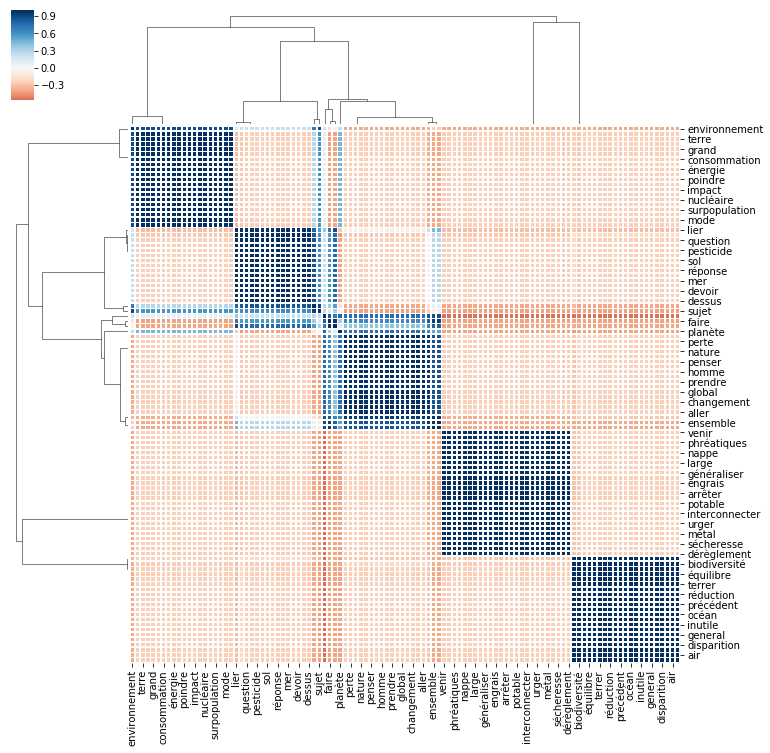

In [48]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

## The LDA result of Bretagne

In [87]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
0      40.355587        1       1 -372.142456 -195.243271
1      30.805576        1       2 -437.769562 -443.703552
2      28.838835        1       3 -620.127258 -262.638367, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
14    Default  319.000000    climatiques  319.000000  30.0000  30.0000
17    Default  304.000000     sécheresse  304.000000  29.0000  29.0000
15    Default  305.000000         croire  305.000000  28.0000  28.0000
16    Default  328.000000    dérèglement  328.000000  27.0000  27.0000
13    Default  386.000000      pollution  386.000000  26.0000  26.0000
12    Default  333.000000            air  333.000000  25.0000  25.0000
11    Default  219.000000         espèce  219.000000  24.0000  24.0000
10    Default  219.000000    disparition  219.000000  23.0000  23.0000
9     Default  232.000000   biodiversité  232.000000  22.0000  22.0000
21    Default   38.000000           lier   38.000000  21.0000  21.0000
171   Default   30.000000         déchet   30.000000  20.0000  20.0000
157   Default   35.000000            eau   35.000000  19.0000  19.0000
22    Default   14.000000       littoral   14.000000  18.0000  18.0000
27    Default   16.000000        érosion   16.000000  17.0000  17.0000
58    Default   27.000000     climatique   27.000000  16.0000  16.0000
221   Default   13.000000      nucléaire   13.000000  15.0000  15.0000
24    Default   52.000000       problème   52.000000  14.0000  14.0000
191   Default    9.000000          océan    9.000000  13.0000  13.0000
205   Default   15.000000       produire   15.000000  12.0000  12.0000
259   Default   12.000000          effet   12.000000  11.0000  11.0000
105   Default   13.000000          faire   13.000000  10.0000  10.0000
305   Default    8.000000        général    8.000000   9.0000   9.0000
130   Default   35.000000       importer   35.000000   8.0000   8.0000
222   Default   10.000000     plastiquer   10.000000   7.0000   7.0000
163   Default   14.000000       ensemble   14.000000   6.0000   6.0000
166   Default    7.000000        réponse    7.000000   5.0000   5.0000
190   Default    8.000000            mer    8.000000   4.0000   4.0000
471   Default    4.000000        globale    4.000000   3.0000   3.0000
449   Default    6.000000     industriel    6.000000   2.0000   2.0000
99    Default   21.000000         terrer   21.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
381    Topic3    2.563121     protection    3.127140   1.0446  -6.4560
760    Topic3    2.743014         lutter    3.364460   1.0392  -6.3881
551    Topic3    1.943206      phénomène    2.350647   1.0531  -6.7329
397    Topic3    5.468778        prendre    7.905709   0.8749  -5.6981
156    Topic3    5.411359     politiquer    7.874443   0.8683  -5.7087
146    Topic3    2.721967        respect    3.513441   0.9882  -6.3958
233    Topic3    3.479624        choisir    4.704047   0.9419  -6.1503
105    Topic3    8.256915          faire   13.395343   0.7596  -5.2862
24     Topic3   25.055012       problème   52.184929   0.5097  -4.1761
82     Topic3    5.301467          homme    8.298060   0.7954  -5.7292
124    Topic3    4.431481          aller    6.598097   0.8454  -5.9085
163    Topic3    8.063601       ensemble   14.319170   0.6692  -5.3098
459    Topic3    4.114439       question    6.036974   0.8600  -5.9827
281    Topic3    4.060233        traiter    6.037925   0.8466  -5.9960
442    Topic3    4.733789       écologie    7.461662   0.7884  -5.8425
58     Topic3   12.284787     climatique   27.567039   0.4352  -4.8888
130    Topic3   14.604648       importer   35.651394   0.3510  -4.7159
61     Topic3    4.159697            foi    6.690561   0.7682  -5.9718
126    Topic3    6.559101         devoir   14.

(59, 3)
(3, 59)


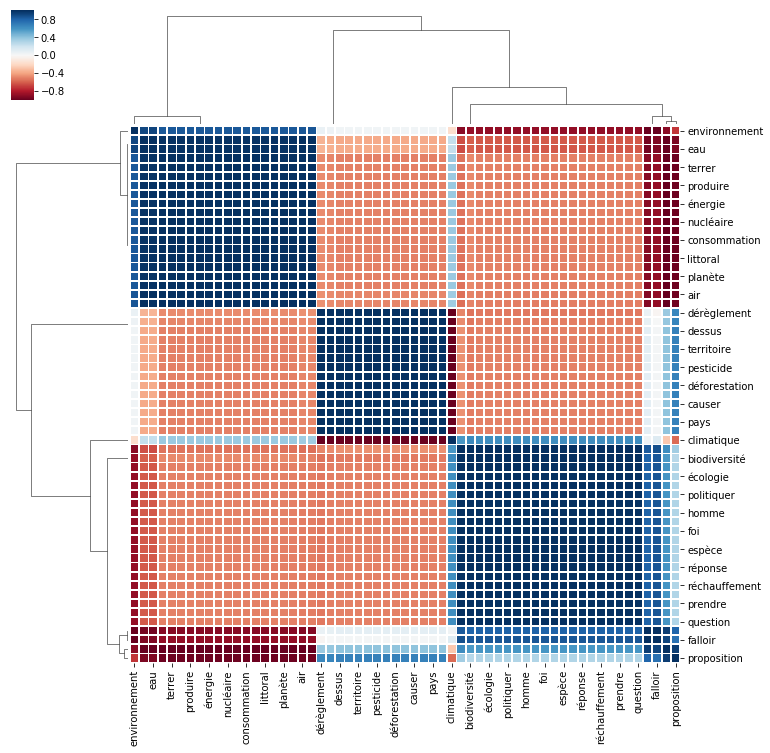

In [88]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [103]:
import pandas as pd
df=pd.read_csv("./region_new/Bourgogne.csv")

In [104]:
df.columns[12]

"QUXVlc3Rpb246MTYw - Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?"

In [105]:
data2=df[df.columns[12]]
print("The answer number before delete none: ",data2.size)
data2=data2.dropna(axis=0)  
print("The useful answer number: ",data2.size)

The answer number before delete none:  3890
The useful answer number:  3731


In [106]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords 
stop = stopwords.words('french')
stopwords_french = stop+["com", "Ap.", "Apr.", "GHz", "MHz", "USD", "a", "afin", "ah", "ai", "aie", "aient", "aies", "ait", "alors", "après", "as", "attendu", "au", "au-delà", "au-devant", "aucun", "aucune", "audit", "auprès", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autour", "autre", "autres", "autrui", "aux", "auxdites", "auxdits", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avons", "ayant", "ayez", "ayons", "b", "bah", "banco", "ben", "bien", "bé", "c", "c'", "c'est", "c'était", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cents", "cependant", "certain", "certaine", "certaines", "certains", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "cf.", "cg", "cgr", "chacun", "chacune", "chaque", "chez", "ci", "cinq", "cinquante", "cinquante-cinq", "cinquante-deux", "cinquante-et-un", "cinquante-huit", "cinquante-neuf", "cinquante-quatre", "cinquante-sept", "cinquante-six", "cinquante-trois", "cl", "cm", "cm2", "comme", "contre", "d", "d'", "d'après", "d'un", "d'une", "dans", "de", "depuis", "derrière", "des", "desdites", "desdits", "desquelles", "desquels", "deux", "devant", "devers", "dg", "différentes", "différents", "divers", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dl", "dm", "donc", "dont", "douze", "du", "dudit", "duquel", "durant", "dès", "déjà", "e", "eh", "elle", "elles", "en", "en-dehors", "encore", "enfin", "entre", "envers", "es", "est", "et", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "e?mes", "e?t", "e?tes", "f", "fait", "fi", "flac", "fors", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "f?mes", "f?t", "f?tes", "g", "gr", "h", "ha", "han", "hein", "hem", "heu", "hg", "hl", "hm", "hm3", "holà", "hop", "hormis", "hors", "huit", "hum", "hé", "i", "ici", "il", "ils", "j", "j'", "j'ai", "j'avais", "j'étais", "jamais", "je", "jusqu'", "jusqu'au", "jusqu'aux", "jusqu'à", "jusque", "k", "kg", "km", "km2", "l", "l'", "l'autre", "l'on", "l'un", "l'une", "la", "laquelle", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "lez", "lors", "lorsqu'", "lorsque", "lui", "lès", "m", "m'", "ma", "maint", "mainte", "maintes", "maints", "mais", "malgré", "me", "mes", "mg", "mgr", "mil", "mille", "milliards", "millions", "ml", "mm", "mm2", "moi", "moins", "mon", "moyennant", "mt", "m2", "m3", "même", "mêmes", "n", "n'avait", "n'y", "ne", "neuf", "ni", "non", "nonante", "nonobstant", "nos", "notre", "nous", "nul", "nulle", "no",
                    "néanmoins", "o", "octante", "oh", "on", "ont", "onze", "or", "ou", "outre", "où", "p", "par", "par-delà", "parbleu", "parce", "parmi", "pas", "passé", "pendant", "personne", "peu", "plus", "plus_d'un", "plus_d'une", "plusieurs", "pour", "pourquoi", "pourtant", "pourvu", "près", "puisqu'", "puisque", "q", "qu", "qu'", "qu'elle", "qu'elles", "qu'il", "qu'ils", "qu'on", "quand", "quant", "quarante", "quarante-cinq", "quarante-deux", "quarante-et-un", "quarante-huit", "quarante-neuf", "quarante-quatre", "quarante-sept", "quarante-six", "quarante-trois", "quatorze", "quatre", "quatre-vingt", "quatre-vingt-cinq", "quatre-vingt-deux", "quatre-vingt-dix", "quatre-vingt-dix-huit", "quatre-vingt-dix-neuf", "quatre-vingt-dix-sept", "quatre-vingt-douze", "quatre-vingt-huit", "quatre-vingt-neuf", "quatre-vingt-onze", "quatre-vingt-quatorze", "quatre-vingt-quatre", "quatre-vingt-quinze", "quatre-vingt-seize", "quatre-vingt-sept", "quatre-vingt-six", "quatre-vingt-treize", "quatre-vingt-trois", "quatre-vingt-un", "quatre-vingt-une", "quatre-vingts", "que", "quel", "quelle", "quelles", "quelqu'", "quelqu'un", "quelqu'une", "quelque", "quelques", "quelques-unes", "quelques-uns", "quels", "qui", "quiconque", "quinze", "quoi", "quoiqu'", "quoique", "r", "revoici", "revoilà", "rien", "s", "s'", "sa", "sans", "sauf", "se", "seize", "selon", "sept", "septante", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "si", "sinon", "six", "soi", "soient", "sois", "soit", "soixante", "soixante-cinq", "soixante-deux", "soixante-dix", "soixante-dix-huit", "soixante-dix-neuf", "soixante-dix-sept", "soixante-douze", "soixante-et-onze", "soixante-et-un", "soixante-et-une", "soixante-huit", "soixante-neuf", "soixante-quatorze", "soixante-quatre", "soixante-quinze", "soixante-seize", "soixante-sept", "soixante-six", "soixante-treize", "soixante-trois", "sommes", "son", "sont", "sous", "soyez", "soyons", "suis", "suite", "sur", "sus", "t", "t'", "ta", "tacatac", "tandis", "te", "tel", "telle", "telles", "tels", "tes", "toi", "ton", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "trente-cinq", "trente-deux", "trente-et-un", "trente-huit", "trente-neuf", "trente-quatre", "trente-sept", "trente-six", "trente-trois", "trois", "très", "tu", "u", "un", "une", "unes", "uns", "v", "vers", "via", "vingt", "vingt-cinq", "vingt-deux", "vingt-huit", "vingt-neuf", "vingt-quatre", "vingt-sept", "vingt-six", "vingt-trois", "vis-à-vis", "voici", "voilà", "vos", "votre", "vous", "w", "x", "y", "z", "zéro", "à", "?'", "?a", "ès", "étaient", "étais", "était", "étant", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "?"]

transformer=TfidfVectorizer( max_features  =1000, decode_error = 'ignore', stop_words = stopwords_french )

tfidf = transformer.fit_transform(data2)


In [107]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 3
lda = LatentDirichletAllocation(n_topics=n_topics, 
                                max_iter=50,
                                learning_method='batch')
lda.fit(tfidf)         


F:\AI\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=3, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [108]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic #%d:" % topic_idx)
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

    print( model.components_)

words=transformer.get_feature_names()
n_top_words=10
print_top_words(lda, words, n_top_words)


Topic #0:
pollution air problème lier importer eau climatique sol environnement déchet
Topic #1:
disparition espèce biodiversité érosion littoral proposition dechets foi importantes transports
Topic #2:
sécheresse croire dérèglement climatiques polution graviter animales mélange commerce nettoyage
[[2.64121225 4.16348571 1.18473517 ... 0.92057662 3.80153469 0.78611179]
 [0.33936842 0.33951427 0.33482166 ... 0.33524601 0.33761754 0.33413306]
 [0.3358603  0.33497519 0.33446273 ... 0.33608967 0.33589343 0.33391222]]


In [109]:
from gensim import corpora, models, similarities

from nltk.corpus import stopwords 
stop = stopwords.words('french')
stopwords_french = stop+["com", "Ap.", "Apr.", "GHz", "MHz", "USD", "a", "afin", "ah", "ai", "aie", "aient", "aies", "ait", "alors", "après", "as", "attendu", "au", "au-delà", "au-devant", "aucun", "aucune", "audit", "auprès", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autour", "autre", "autres", "autrui", "aux", "auxdites", "auxdits", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avons", "ayant", "ayez", "ayons", "b", "bah", "banco", "ben", "bien", "bé", "c", "c'", "c'est", "c'était", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cents", "cependant", "certain", "certaine", "certaines", "certains", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "cf.", "cg", "cgr", "chacun", "chacune", "chaque", "chez", "ci", "cinq", "cinquante", "cinquante-cinq", "cinquante-deux", "cinquante-et-un", "cinquante-huit", "cinquante-neuf", "cinquante-quatre", "cinquante-sept", "cinquante-six", "cinquante-trois", "cl", "cm", "cm2", "comme", "contre", "d", "d'", "d'après", "d'un", "d'une", "dans", "de", "depuis", "derrière", "des", "desdites", "desdits", "desquelles", "desquels", "deux", "devant", "devers", "dg", "différentes", "différents", "divers", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dl", "dm", "donc", "dont", "douze", "du", "dudit", "duquel", "durant", "dès", "déjà", "e", "eh", "elle", "elles", "en", "en-dehors", "encore", "enfin", "entre", "envers", "es", "est", "et", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "e?mes", "e?t", "e?tes", "f", "fait", "fi", "flac", "fors", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "f?mes", "f?t", "f?tes", "g", "gr", "h", "ha", "han", "hein", "hem", "heu", "hg", "hl", "hm", "hm3", "holà", "hop", "hormis", "hors", "huit", "hum", "hé", "i", "ici", "il", "ils", "j", "j'", "j'ai", "j'avais", "j'étais", "jamais", "je", "jusqu'", "jusqu'au", "jusqu'aux", "jusqu'à", "jusque", "k", "kg", "km", "km2", "l", "l'", "l'autre", "l'on", "l'un", "l'une", "la", "laquelle", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "lez", "lors", "lorsqu'", "lorsque", "lui", "lès", "m", "m'", "ma", "maint", "mainte", "maintes", "maints", "mais", "malgré", "me", "mes", "mg", "mgr", "mil", "mille", "milliards", "millions", "ml", "mm", "mm2", "moi", "moins", "mon", "moyennant", "mt", "m2", "m3", "même", "mêmes", "n", "n'avait", "n'y", "ne", "neuf", "ni", "non", "nonante", "nonobstant", "nos", "notre", "nous", "nul", "nulle", "no",
                    "néanmoins", "o", "octante", "oh", "on", "ont", "onze", "or", "ou", "outre", "où", "p", "par", "par-delà", "parbleu", "parce", "parmi", "pas", "passé", "pendant", "personne", "peu", "plus", "plus_d'un", "plus_d'une", "plusieurs", "pour", "pourquoi", "pourtant", "pourvu", "près", "puisqu'", "puisque", "q", "qu", "qu'", "qu'elle", "qu'elles", "qu'il", "qu'ils", "qu'on", "quand", "quant", "quarante", "quarante-cinq", "quarante-deux", "quarante-et-un", "quarante-huit", "quarante-neuf", "quarante-quatre", "quarante-sept", "quarante-six", "quarante-trois", "quatorze", "quatre", "quatre-vingt", "quatre-vingt-cinq", "quatre-vingt-deux", "quatre-vingt-dix", "quatre-vingt-dix-huit", "quatre-vingt-dix-neuf", "quatre-vingt-dix-sept", "quatre-vingt-douze", "quatre-vingt-huit", "quatre-vingt-neuf", "quatre-vingt-onze", "quatre-vingt-quatorze", "quatre-vingt-quatre", "quatre-vingt-quinze", "quatre-vingt-seize", "quatre-vingt-sept", "quatre-vingt-six", "quatre-vingt-treize", "quatre-vingt-trois", "quatre-vingt-un", "quatre-vingt-une", "quatre-vingts", "que", "quel", "quelle", "quelles", "quelqu'", "quelqu'un", "quelqu'une", "quelque", "quelques", "quelques-unes", "quelques-uns", "quels", "qui", "quiconque", "quinze", "quoi", "quoiqu'", "quoique", "r", "revoici", "revoilà", "rien", "s", "s'", "sa", "sans", "sauf", "se", "seize", "selon", "sept", "septante", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "si", "sinon", "six", "soi", "soient", "sois", "soit", "soixante", "soixante-cinq", "soixante-deux", "soixante-dix", "soixante-dix-huit", "soixante-dix-neuf", "soixante-dix-sept", "soixante-douze", "soixante-et-onze", "soixante-et-un", "soixante-et-une", "soixante-huit", "soixante-neuf", "soixante-quatorze", "soixante-quatre", "soixante-quinze", "soixante-seize", "soixante-sept", "soixante-six", "soixante-treize", "soixante-trois", "sommes", "son", "sont", "sous", "soyez", "soyons", "suis", "suite", "sur", "sus", "t", "t'", "ta", "tacatac", "tandis", "te", "tel", "telle", "telles", "tels", "tes", "toi", "ton", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "trente-cinq", "trente-deux", "trente-et-un", "trente-huit", "trente-neuf", "trente-quatre", "trente-sept", "trente-six", "trente-trois", "trois", "très", "tu", "u", "un", "une", "unes", "uns", "v", "vers", "via", "vingt", "vingt-cinq", "vingt-deux", "vingt-huit", "vingt-neuf", "vingt-quatre", "vingt-sept", "vingt-six", "vingt-trois", "vis-à-vis", "voici", "voilà", "vos", "votre", "vous", "w", "x", "y", "z", "zéro", "à", "?'", "?a", "ès", "étaient", "étais", "était", "étant", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "?"]
texts = [[word for word in str(document).lower().split() if word not in stopwords_french] for document in data2]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
total_topics = 3
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf]
lda.show_topics(total_topics,5)

[(0,
  '0.113*"biodiversité" + 0.111*"disparition" + 0.109*"espèce" + 0.105*"pollution" + 0.094*"air"'),
 (1,
  '0.163*"dérèglement" + 0.158*"climatiques" + 0.153*"sécheresse" + 0.151*"croire" + 0.005*"pollution"'),
 (2,
  '0.029*"problème" + 0.013*"importer" + 0.012*"lier" + 0.012*"pouvoir" + 0.011*"environnement"')]